Task: You will use the Iris diabetes dataset. The dataset corresponds to a clustering problem on
which you need to make predictions based on given the 3 iris species with 50 samples each, as well
as some properties about each flower in the dataset. You are asked to predict the classes of flowers
by using K-means and Hierarchical Clustering methods.

Complete Homework with following steps:
    1. Name your final Homework Script as “Iris_classification”.
    2.Create repository named “Clustering_Python” in your Github account and push your Homework
    Script to this repository.
    3.Fork other users’ repositories, make pull requests (at least one, making three pull requests is
    desirable).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from  matplotlib.colors import ListedColormap

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.drop(df.iloc[:, 0:1],inplace=True,axis=1)

In [10]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)

In [13]:
df['Species'].unique()

array([1, 2, 3])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

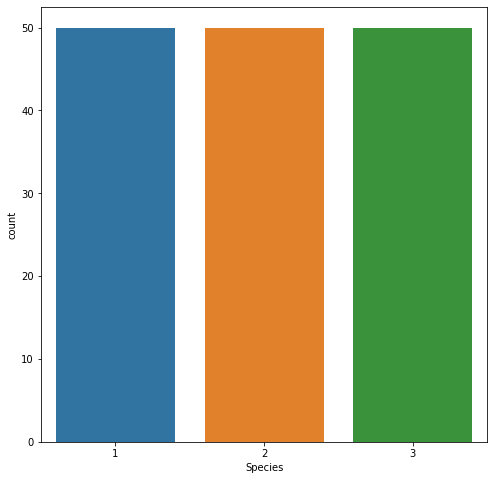

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(df['Species'])

Text(0.5, 0, 'The sepal length of flower in cm')

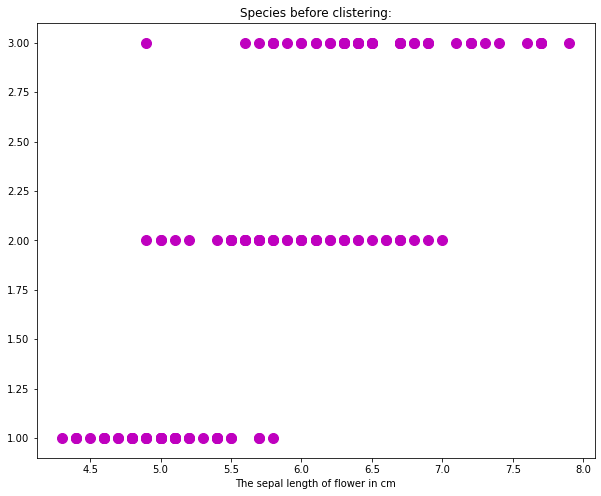

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df['SepalLengthCm'],df['Species'],s=100,c='m')
plt.title('Species before clistering:')
plt.xlabel('The sepal length of flower in cm')

# Elbow method

In [16]:
wcss = []

for i in range(2,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=21)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
print(wcss)
    

[179.12221033868093, 87.31002785114046, 66.97905140650855, 50.370387577639754, 42.85017847458066, 35.37683172302738, 31.14056360708535, 28.933507360985914, 27.4114169417539, 25.75946626984127]


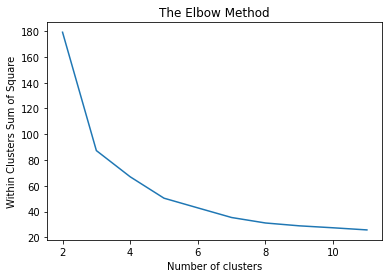

In [17]:
plt.plot((range(2,12)),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Clusters Sum of Square')
plt.show()

# Actually, 5 would be preferable for me we can see on the plot,but at the other hands,i have to use 3 by given task

# Silhouete method

In [18]:
range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=24)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df,cluster_labels)
    print("For n_clusters=",n_clusters,"The average silhouette score is :",silhouette_avg)  

For n_clusters= 2 The average silhouette score is : 0.6798027978812322
For n_clusters= 3 The average silhouette score is : 0.5816937070990904
For n_clusters= 4 The average silhouette score is : 0.5420271966028236
For n_clusters= 5 The average silhouette score is : 0.5187741145336751
For n_clusters= 6 The average silhouette score is : 0.5205507359990711
For n_clusters= 7 The average silhouette score is : 0.3935133935317094
For n_clusters= 8 The average silhouette score is : 0.37402055937546064
For n_clusters= 9 The average silhouette score is : 0.3508407745464921
For n_clusters= 10 The average silhouette score is : 0.31708591044962114
For n_clusters= 11 The average silhouette score is : 0.30864937502076195


The 6  looks is great as K but The 3 has given us on the task actually

In [19]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [20]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [21]:
y_kmeans==1,0

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

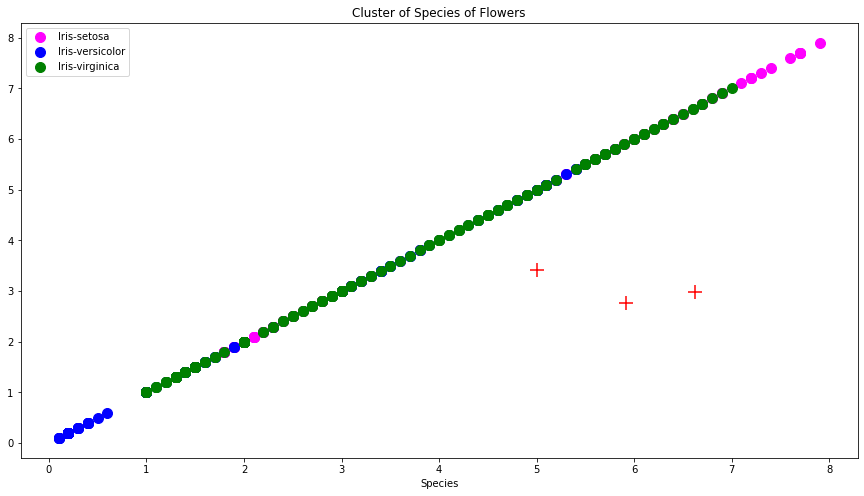

In [22]:
plt.figure(figsize=(15,8))
plt.scatter(df.loc[y_kmeans==0],df[y_kmeans==0],s=100,c='magenta',label='Iris-setosa')
plt.scatter(df[y_kmeans==1],df[y_kmeans==1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(df[y_kmeans==2],df[y_kmeans==2],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker="+")
plt.title('Cluster of Species of Flowers')
plt.xlabel('Species')
plt.legend()
plt.show()

# Hierarchial Clustering

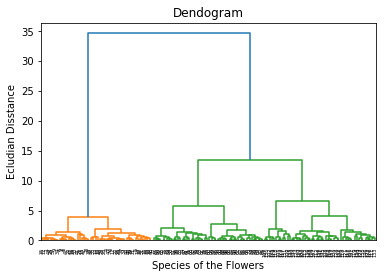

In [32]:
dendogram = sch.dendrogram(sch.linkage(df,method='ward'))
#plt.figure(figsize=(20,11))
plt.title('Dendogram')
plt.xlabel('Species of the Flowers')
plt.ylabel('Ecludian Disstance')
plt.show()

In [24]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df)

In [25]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

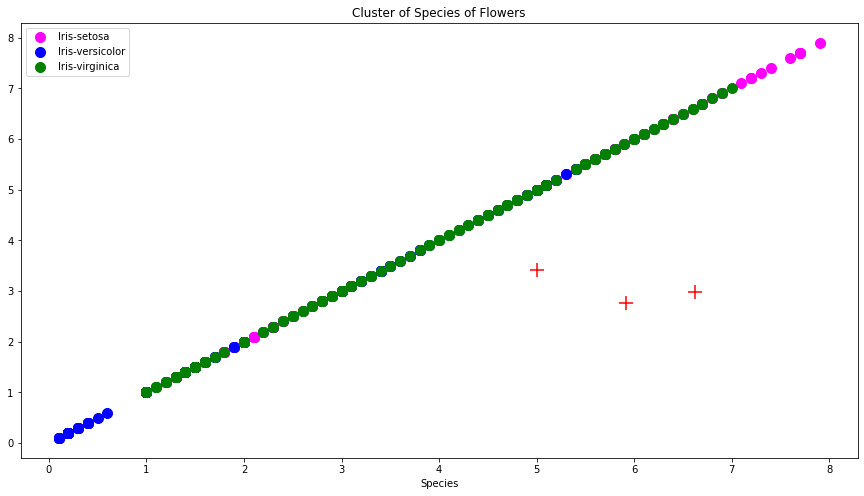

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(df[y_hc==0],df[y_hc==0],s=100,c='magenta',label='Iris-setosa')
plt.scatter(df[y_hc==1],df[y_hc==1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(df[y_hc==2],df[y_hc==2],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker="+")
plt.title('Cluster of Species of Flowers')
plt.xlabel('Species')
plt.legend()
plt.show()

In [27]:
def color_generate():
    colors = []
    for i in df.loc[:,'Species']:
        if i == 'Iris-setosa':
            colors.append('red')
        elif i == 'Iris-versicolor':
            colors.append('magenta')
        else:
            colors.append('green')
    return colors

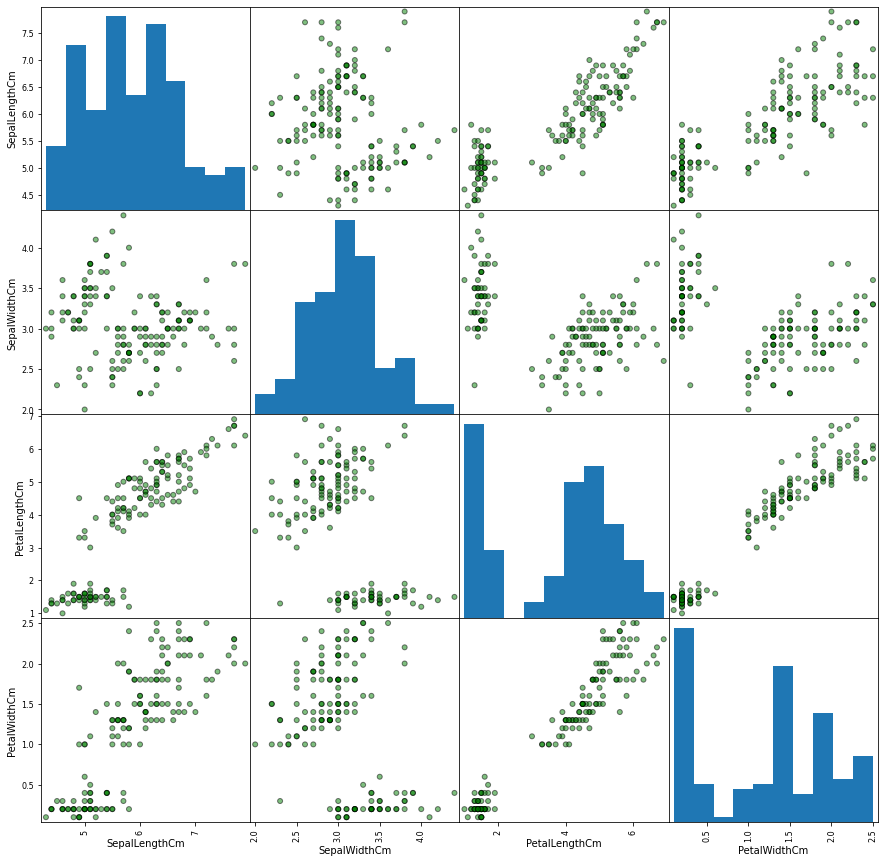

In [28]:
pd.plotting.scatter_matrix(df.loc[:,df.columns !='Species'],
                            c=color_generate(),
                            figsize=(15,15),
                            grid=True,
                            diagonal='hist',
                            alpha=0.5,
                            s = 100,
                            edgecolor='black')
plt.show()

<Figure size 1080x1080 with 0 Axes>

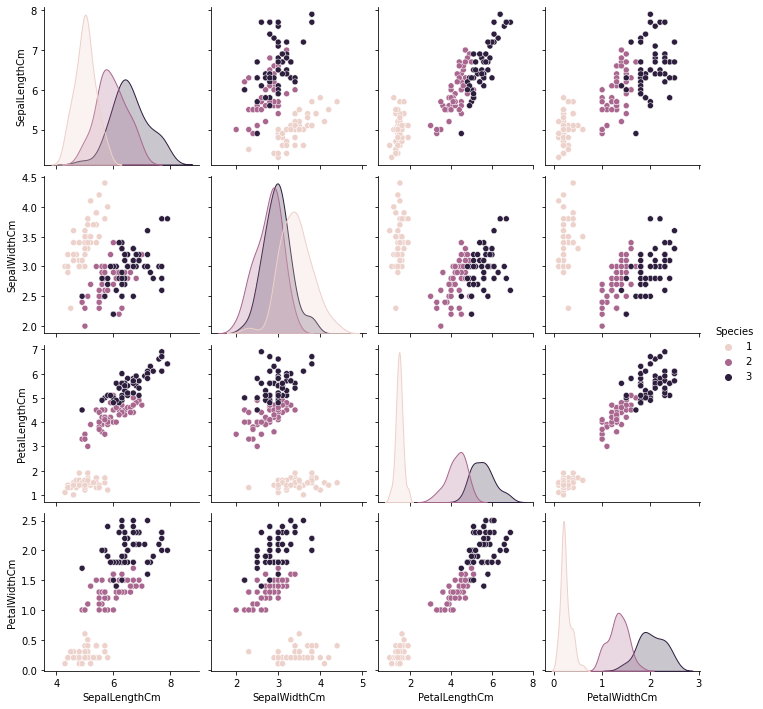

In [113]:
plt.figure(figsize=(15,15))
sns.pairplot(df,hue="Species",)#palette={'Iris-setosa':'red','Iris-versicolor':'magenta','Iris-virginica':'blue'})
plt.show()

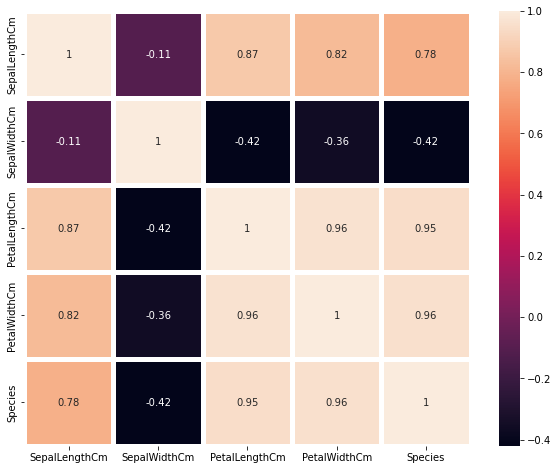

In [77]:
corr = df.corr()
fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True,linewidths= 5,ax=ax)
plt.show()

In [98]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
